In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

# os.getenv("GOOGLE_API_KEY")

True

In [8]:
from google import genai

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))
response = client.models.generate_content(
    model= "gemini-2.5-flash", 
    contents = "Tell me a programming joke")
print(response.text)

Why do programmers prefer dark mode?

Because light attracts bugs!

***

Here's another classic:

A programmer's spouse tells them, "Go to the store and buy a loaf of bread. If they have eggs, buy a dozen."

The programmer returns home with twelve loaves of bread.

Their spouse exclaims, "Why on earth did you buy so much bread?!"

The programmer replies, "They had eggs."


In [15]:
response = client.models.generate_content(
    model= "gemini-2.5-flash", 
    contents = """
    You are a helpful assistant, I need you to create a JSON object representing a library.
    The library's name should be "Coolu Libraru" and have the fields name and books that contains
    a list of books. Each book should have a 'title', 'author' and 'year' field. Make sure the output is a single valid JSON object.
    Give me 10 books. Remove ```json and ```
    """
    )

response.text

'{\n  "name": "Coolu Libraru",\n  "books": [\n    {\n      "title": "The Midnight Library",\n      "author": "Matt Haig",\n      "year": 2020\n    },\n    {\n      "title": "Project Hail Mary",\n      "author": "Andy Weir",\n      "year": 2021\n    },\n    {\n      "title": "Where the Crawdads Sing",\n      "author": "Delia Owens",\n      "year": 2018\n    },\n    {\n      "title": "Dune",\n      "author": "Frank Herbert",\n      "year": 1965\n    },\n    {\n      "title": "Educated",\n      "author": "Tara Westover",\n      "year": 2018\n    },\n    {\n      "title": "Sapiens: A Brief History of Humankind",\n      "author": "Yuval Noah Harari",\n      "year": 2011\n    },\n    {\n      "title": "The Alchemist",\n      "author": "Paulo Coelho",\n      "year": 1988\n    },\n    {\n      "title": "1984",\n      "author": "George Orwell",\n      "year": 1949\n    },\n    {\n      "title": "To Kill a Mockingbird",\n      "author": "Harper Lee",\n      "year": 1960\n    },\n    {\n      "ti

In [13]:
print(response.text)

```json
{
  "name": "Coolu Libraru",
  "books": [
    {
      "title": "The Quantum Enigma",
      "author": "Elara Vance",
      "year": 2018
    },
    {
      "title": "Whispers in the Stacks",
      "author": "Librarian Lucius",
      "year": 1995
    },
    {
      "title": "Chronicles of the Obsidian Key",
      "author": "Kaelen Drake",
      "year": 2007
    },
    {
      "title": "Beneath a Crimson Moon",
      "author": "Seraphina Blackwood",
      "year": 2021
    },
    {
      "title": "The Algorithm's Heartbeat",
      "author": "Dr. Anya Sharma",
      "year": 2015
    },
    {
      "title": "Echoes of Forgotten Stars",
      "author": "Caleb Thorne",
      "year": 1982
    },
    {
      "title": "The Alchemist's Secret Brew",
      "author": "Fiona MacLeod",
      "year": 1973
    },
    {
      "title": "City of Silent Guardians",
      "author": "Detective Miles Corbin",
      "year": 2004
    },
    {
      "title": "Gardens of the Sunken City",
      "author": "I

# pydantic to validate the simulated data


In [17]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title: str
    author: str
    year: int = Field(gt= 1000, lt= datetime.now().year)

class Library(BaseModel):
    name: str
    books: list[Book]

library = Library.model_validate_json(response.text)
library

Library(name='Coolu Libraru', books=[Book(title='The Midnight Library', author='Matt Haig', year=2020), Book(title='Project Hail Mary', author='Andy Weir', year=2021), Book(title='Where the Crawdads Sing', author='Delia Owens', year=2018), Book(title='Dune', author='Frank Herbert', year=1965), Book(title='Educated', author='Tara Westover', year=2018), Book(title='Sapiens: A Brief History of Humankind', author='Yuval Noah Harari', year=2011), Book(title='The Alchemist', author='Paulo Coelho', year=1988), Book(title='1984', author='George Orwell', year=1949), Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960), Book(title='Pride and Prejudice', author='Jane Austen', year=1813)])

In [19]:
library.name, library.books

('Coolu Libraru',
 [Book(title='The Midnight Library', author='Matt Haig', year=2020),
  Book(title='Project Hail Mary', author='Andy Weir', year=2021),
  Book(title='Where the Crawdads Sing', author='Delia Owens', year=2018),
  Book(title='Dune', author='Frank Herbert', year=1965),
  Book(title='Educated', author='Tara Westover', year=2018),
  Book(title='Sapiens: A Brief History of Humankind', author='Yuval Noah Harari', year=2011),
  Book(title='The Alchemist', author='Paulo Coelho', year=1988),
  Book(title='1984', author='George Orwell', year=1949),
  Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960),
  Book(title='Pride and Prejudice', author='Jane Austen', year=1813)])

In [22]:
library.books[1].title, library.books[1].year

('Project Hail Mary', 2021)

In [23]:
titles = [book.title for book in library.books]
titles

['The Midnight Library',
 'Project Hail Mary',
 'Where the Crawdads Sing',
 'Dune',
 'Educated',
 'Sapiens: A Brief History of Humankind',
 'The Alchemist',
 '1984',
 'To Kill a Mockingbird',
 'Pride and Prejudice']

In [25]:
newer_books = [(book.title, book.year) for book in library.books if book.year > 1990]
newer_books

[('The Midnight Library', 2020),
 ('Project Hail Mary', 2021),
 ('Where the Crawdads Sing', 2018),
 ('Educated', 2018),
 ('Sapiens: A Brief History of Humankind', 2011)]

In [ ]:
library.model_dump() # model_dump gör objektet till en dict

{'name': 'Coolu Libraru',
 'books': [{'title': 'The Midnight Library',
   'author': 'Matt Haig',
   'year': 2020},
  {'title': 'Project Hail Mary', 'author': 'Andy Weir', 'year': 2021},
  {'title': 'Where the Crawdads Sing', 'author': 'Delia Owens', 'year': 2018},
  {'title': 'Dune', 'author': 'Frank Herbert', 'year': 1965},
  {'title': 'Educated', 'author': 'Tara Westover', 'year': 2018},
  {'title': 'Sapiens: A Brief History of Humankind',
   'author': 'Yuval Noah Harari',
   'year': 2011},
  {'title': 'The Alchemist', 'author': 'Paulo Coelho', 'year': 1988},
  {'title': '1984', 'author': 'George Orwell', 'year': 1949},
  {'title': 'To Kill a Mockingbird', 'author': 'Harper Lee', 'year': 1960},
  {'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813}]}

In [28]:
library.model_dump_json() # Gör det till en JSON string

'{"name":"Coolu Libraru","books":[{"title":"The Midnight Library","author":"Matt Haig","year":2020},{"title":"Project Hail Mary","author":"Andy Weir","year":2021},{"title":"Where the Crawdads Sing","author":"Delia Owens","year":2018},{"title":"Dune","author":"Frank Herbert","year":1965},{"title":"Educated","author":"Tara Westover","year":2018},{"title":"Sapiens: A Brief History of Humankind","author":"Yuval Noah Harari","year":2011},{"title":"The Alchemist","author":"Paulo Coelho","year":1988},{"title":"1984","author":"George Orwell","year":1949},{"title":"To Kill a Mockingbird","author":"Harper Lee","year":1960},{"title":"Pride and Prejudice","author":"Jane Austen","year":1813}]}'

In [30]:
with open("Library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))

## create pandas df

In [32]:
import pandas as pd

titles = [book.title for book in library.books]
years = [book.year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "year": years, "author": authors})
df

,title,year,author
0,The Midnight Library,2020,Matt Haig
1,Project Hail Mary,2021,Andy Weir
2,Where the Crawdads Sing,2018,Delia Owens
3,Dune,1965,Frank Herbert
4,Educated,2018,Tara Westover
5,Sapiens: A Brief History of Humankind,2011,Yuval Noah Harari
6,The Alchemist,1988,Paulo Coelho
7,1984,1949,George Orwell
8,To Kill a Mockingbird,1960,Harper Lee
9,Pride and Prejudice,1813,Jane Austen


<Axes: ylabel='Frequency'>

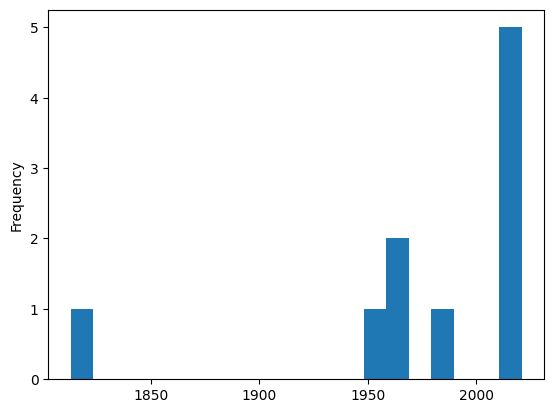

In [33]:
df["year"].plot(kind = "hist", bins=20)